# Import and Setup

Import general packages and YLXPS-related packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os 
import scipy
import importlib
import datetime as dt
import matplotlib
import pandas as pd

plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../analysis/')
import HelperClasses as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [2]:
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../analysis\\PlotFunctions.py'>

# Data Read-In

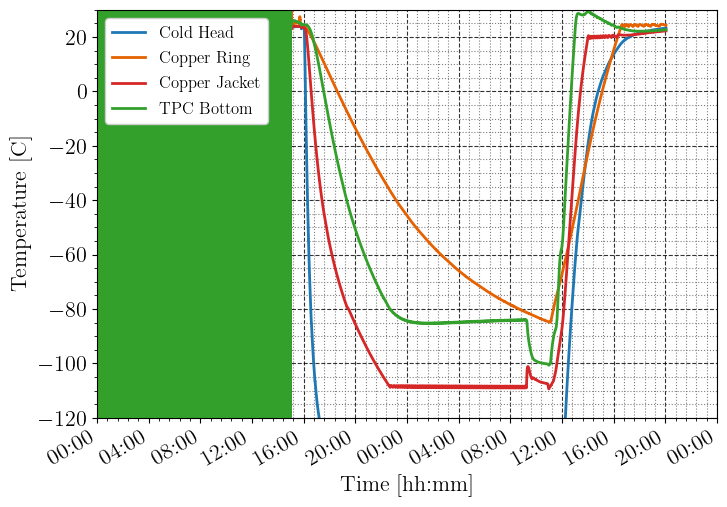

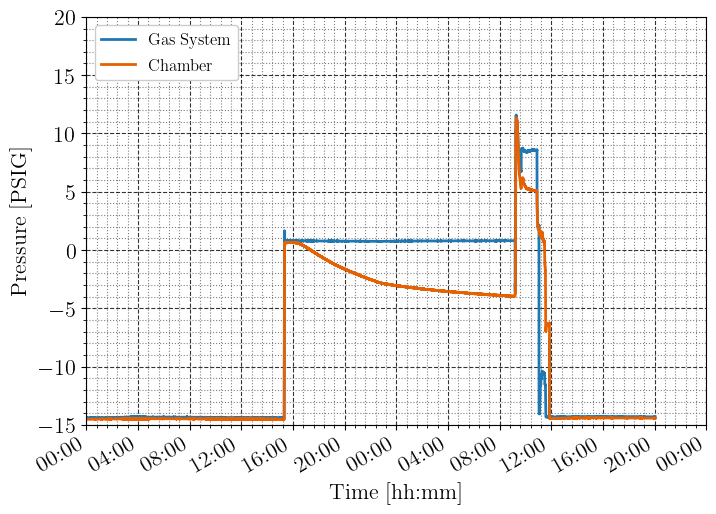

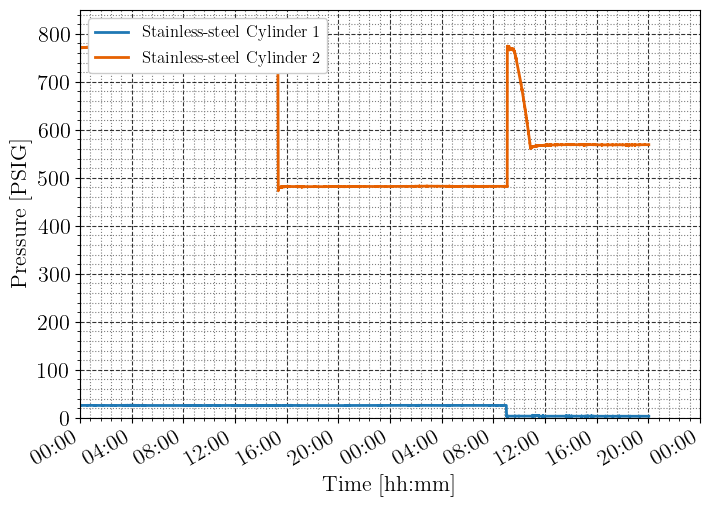

In [3]:
Sensors = []
Files = ['C:/Data/StandStatus/20210504.h5', 'C:/Data/StandStatus/20210505.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,5,4,0,0), dt.datetime(2021,5,6,0,0)]
 
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,30])
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20])
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850])

 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_0.h5
 | Number of files in ch1...	 11/11
 | Number of files in ch2...	 11/11
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_1_0.h5
 | Number of files in ch1...	 100/111
 | Number of files in ch2...	 100/111
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_1_1.h5
 | Number of files in ch1...	 98/209
 | Number of files in ch2...	 98/209
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_2_0.h5
 | Number of files in ch1...	 100/309
 | Number of files in ch2...	 100/309
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_2_1.h5
 | Number of files in ch1...	 99/408
 | Number of files in ch2...	 99/408
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_2_2.h5
 | Number of files in ch1...	 100/508
 | Number of files in ch2...	 100/508
 | Filename... C:/Data/20210505\Filling_C-200V_A-1000V_2_3.h5
 | Number of files in ch1...	 100/608
 | Number of files in ch2...	 100/608
 | Filename... C:/Data/20210505\Filling_C-20

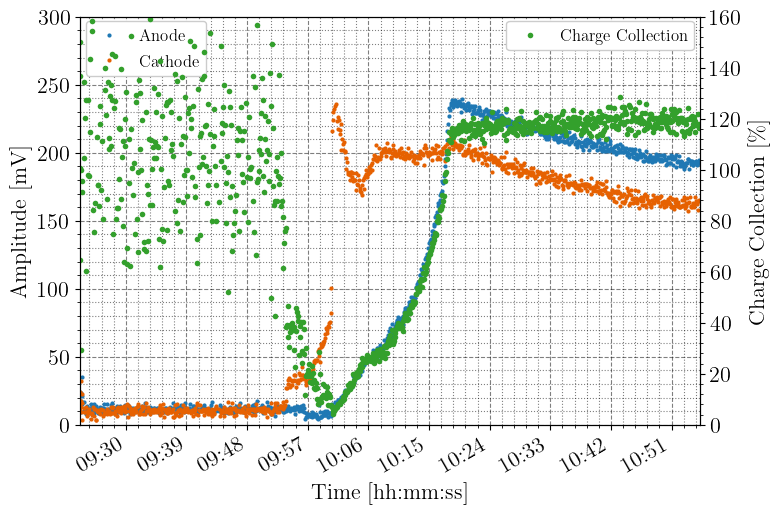

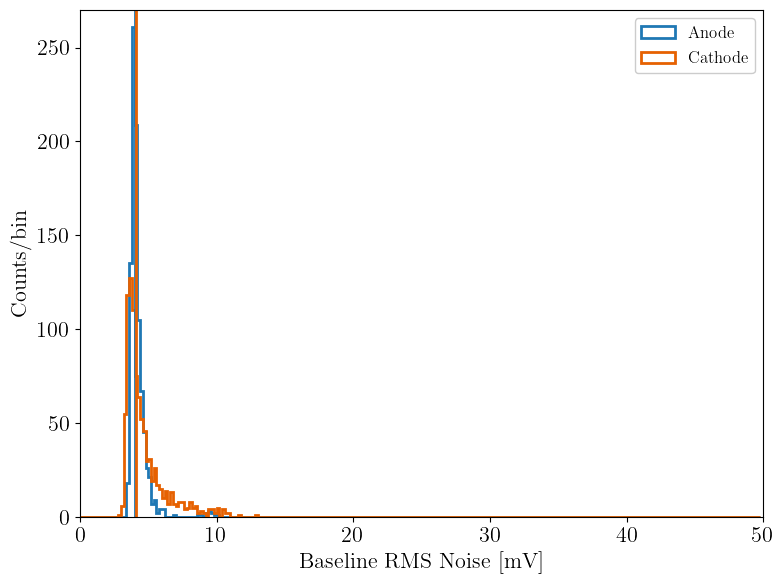

In [4]:
D1 = Dataset.Dataset(Path='C:/Data/20210505/', Selection='Filling*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=50, YMax=300)
D1.ShowBaselineNoise(BinMax=50)

In [5]:
delta = dt.datetime(2021,5,5,0,0) - dt.datetime(2021,3,29,0,0)
print(delta)
capdata_last = pd.read_csv("C:/Data/LevelMeter/20210329_liquefaction_6.csv", names=['Time', 'Level'])
timestamp_last = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") + delta for x in capdata_last['Time']])
cap_last = np.array(capdata_last['Level'])

print(timestamp_last[-1])

37 days, 0:00:00
2021-05-05 18:04:14


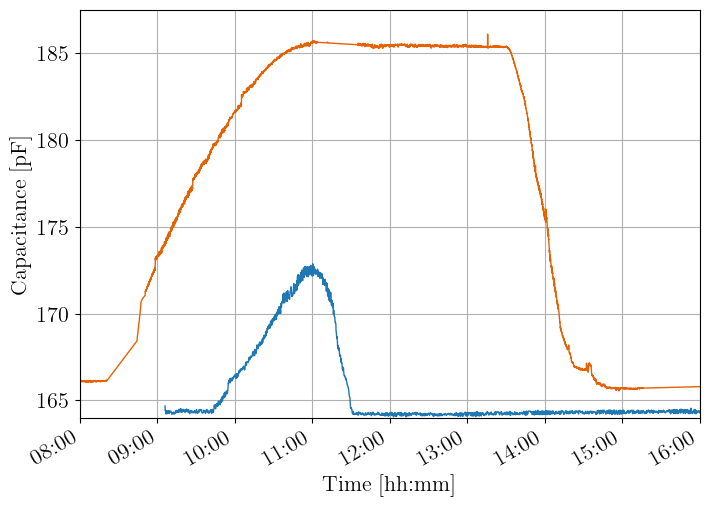

In [6]:
capdata = pd.read_csv("C:/Data/LevelMeter/20210505_liquefaction_8.csv", names=['Time', 'Level'])
timestamp = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") for x in capdata['Time']])
cap = np.array(capdata['Level'])
formatter = matplotlib.dates.DateFormatter('%H:%M')

fig = plt.figure()
ax = fig.gca()

XRange = [dt.datetime(2021,5,5,8,0), dt.datetime(2021,5,5,16,0)]

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Time [hh:mm]')
plt.ylabel('Capacitance [pF]')


plt.xlim(XRange[0], XRange[1])
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=60))

cut = np.where((timestamp>XRange[0]) & (cap>0))
plt.plot(timestamp[cut][::10], cap[cut][::10], lw=1)

cut_last = np.where((timestamp_last>XRange[0]) & (cap_last>0))
plt.errorbar(timestamp_last[cut_last][::10], cap_last[cut_last][::10], lw=1)
             
plt.ylim(164,187.5)
# plt.ylim(164,167.5)
plt.savefig('recovery.png')
plt.show() 